Housing Price Prediction using Ridge and Lasso Regression

Problem Statemenet:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

In [1907]:
# let us import all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [1908]:
#reading dataset
house_data = pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1909]:
#check shape
house_data.shape

(1460, 81)

In [1910]:
#check null attributes and datatype
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1911]:
house_data.Alley.isna()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21      False
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30      False
31       True
32       True
33       True
34       True
35       True
36       True
37       True
38       True
39       True
40       True
41       True
42       True
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55       True
56      False
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69       True
70       True
71    

We can Notice that the python library is considering NA as Null but in the case of Alley it makes sense according to data dictionary

So we will replace the NAs in such columns with NotApplicable

In [1912]:
change_to_NotApplicable = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType']
house_data.update(house_data[change_to_NotApplicable].fillna('NotApplicable'))
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NotApplicable,Reg,Lvl,AllPub,...,0,NotApplicable,NotApplicable,NotApplicable,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NotApplicable,Reg,Lvl,AllPub,...,0,NotApplicable,NotApplicable,NotApplicable,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NotApplicable,IR1,Lvl,AllPub,...,0,NotApplicable,NotApplicable,NotApplicable,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NotApplicable,IR1,Lvl,AllPub,...,0,NotApplicable,NotApplicable,NotApplicable,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NotApplicable,IR1,Lvl,AllPub,...,0,NotApplicable,NotApplicable,NotApplicable,0,12,2008,WD,Normal,250000


In [1913]:
# Now let us check for genuine missing values
house_data.columns[house_data.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [1914]:
# columns with missing values
columns_with_missing_values = house_data.columns[house_data.isna().sum() > 0]
columns_with_missing_values

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [1915]:
#Find missing percentage for these columns
MissingPercentage = pd.DataFrame(round(house_data[columns_with_missing_values].isna().sum()/len(house_data.index)*100,2).sort_values(ascending=False),columns=["Missing %"])
MissingPercentage

,Missing %
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrArea,0.55
Electrical,0.07


In [1916]:
house_data.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [1917]:
# Since none of the data is majorly missing we will try not to remove them and instead try to impute
# We will use median for LotFrontage
house_data.update(house_data['LotFrontage'].fillna(house_data['LotFrontage'].median()))
# We will use fill with 0 for MasVnrArea
house_data.update(house_data['MasVnrArea'].fillna(house_data['LotFrontage'].median()))
# We will use mode for GarageYrBlt, Electrical, 
house_data.update(house_data['GarageYrBlt'].fillna(house_data['GarageYrBlt'].mode().iloc[0]))
house_data.update(house_data['Electrical'].fillna(house_data['Electrical'].mode().iloc[0]))

In [1918]:
house_data.columns[house_data.isna().sum() > 0]

Index([], dtype='object')

In [1919]:
MissingPercentage = pd.DataFrame(round(house_data.isna().sum()/len(house_data.index)*100,2).sort_values(ascending=False),columns=["Missing %"])
MissingPercentage

,Missing %
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


We have handled missing values now

There are ordinal values in the Dataset, for example BsmtQual, we should convert these into ordered integer maps in order to keep their order intact

In [1920]:
house_data['BsmtQual'].value_counts()

TA               649
Gd               618
Ex               121
NotApplicable     37
Fa                35
Name: BsmtQual, dtype: int64

In [1921]:

#since ExterQual, ExterCond is ordered categorical, we can convert to numeric
# NA -> not applicable -> this happens when feature is not avaiable. hence giving zero weight for NA
ordered_quality_map = {"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NotApplicable": 0}
house_data.ExterQual = house_data.ExterQual.map(ordered_quality_map)
house_data.ExterCond = house_data.ExterCond.map(ordered_quality_map)


#similarly do it for other quality based columns
#BsmtQual, BsmtCond
house_data.BsmtQual = house_data.BsmtQual.map(ordered_quality_map)
house_data.BsmtCond = house_data.BsmtCond.map(ordered_quality_map)

#HeatingQC
house_data.HeatingQC = house_data.HeatingQC.map(ordered_quality_map)

#KitchenQual, FireplaceQu
house_data.KitchenQual = house_data.KitchenQual.map(ordered_quality_map)
house_data.FireplaceQu = house_data.FireplaceQu.map(ordered_quality_map)

#GarageQual, GarageCond
house_data.GarageQual = house_data.GarageQual.map(ordered_quality_map)
house_data.GarageCond = house_data.GarageCond.map(ordered_quality_map)


# BsmtFinType1, BsmtFinType2
bsmt_finished_qual_map = {"GLQ": 6,"ALQ": 5,"BLQ": 4,"Rec": 3,"LwQ": 2,"Unf": 1,"NotApplicable": 0}
house_data.BsmtFinType1 = house_data.BsmtFinType1.map(bsmt_finished_qual_map)
house_data.BsmtFinType2 = house_data.BsmtFinType2.map(bsmt_finished_qual_map)

# Functional: Home functionality (Assume typical unless deductions are warranted)
functional_map = {"Typ": 8,"Min1":7,"Min2":6,"Mod": 5,"Maj1":4,"Maj2":3,"Sev": 2,"Sal": 1,}
house_data.Functional = house_data.Functional.map(functional_map)

#GarageFinish: Interior finish of the garage
garage_finish_map = {"Fin": 3,"RFn": 2,"Unf": 1,"NotApplicable": 0}
house_data.GarageFinish = house_data.GarageFinish.map(garage_finish_map)


#BrkComm and Brk Cmn are same so refactor
# similarly WdSHng and Cment Bd are mistyped
house_data.Exterior2nd = house_data.Exterior2nd.apply(lambda x: "BrkComm" if x=='Brk Cmn' else x)
house_data.Exterior2nd = house_data.Exterior2nd.apply(lambda x: "WdShing" if x=="Wd Shng" else x)
house_data.Exterior2nd = house_data.Exterior2nd.apply(lambda x: "CemntBd" if x=='CmentBd' else x)


# Exterior1st and Exterior2nd must be merged together and then dummies should be created.
house_data.Exterior = house_data.Exterior1st + ',' + house_data.Exterior2nd
house_data.Exterior.apply(lambda x: str(x).lower())
house_data.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)
exterior_dummies = house_data.Exterior.str.get_dummies(sep=',').add_prefix('Exterior_')
housing_sales_data = pd.concat([house_data, exterior_dummies], axis=1)

In [1922]:
house_data['BsmtQual'].value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

Let us now seggregate these into Categorical and Numerical columns


In [1923]:
#Categorical Columns:
categorical_columns  = house_data.select_dtypes(include='object').columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType',
       'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical',
       'GarageType', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [1924]:
#Numerical Columns:
numerical_columns = house_data.select_dtypes(exclude='object').columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1925]:
#Here MSSubClass should be an Categorical value according to Data Dictionary, so converting it to string
house_data.MSSubClass = house_data.MSSubClass.apply(lambda x: str(x))
house_data.MSSubClass.dtype

dtype('O')

In [1926]:
house_data.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.495205,3.39589,3.083562,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.587278,0.57428,0.351054,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,3.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,5.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let us check for uniqueness of the data and remove the data if the 88% or more data is of same class

In [1927]:
#Check for data uniqueness
for i in numerical_columns:
    res=house_data[i].value_counts(normalize=True)*100
    if res.iloc[0] >= 88:
        print("Deleted ",i,res.iloc[0])
        del house_data[i]

Deleted  BsmtCond 89.7945205479452
Deleted  BsmtFinSF2 88.56164383561645
Deleted  LowQualFinSF 98.21917808219179
Deleted  BsmtHalfBath 94.3835616438356
Deleted  KitchenAbvGr 95.34246575342465
Deleted  Functional 93.15068493150685
Deleted  GarageQual 89.7945205479452
Deleted  GarageCond 90.82191780821918
Deleted  3SsnPorch 98.35616438356163
Deleted  ScreenPorch 92.05479452054794
Deleted  PoolArea 99.52054794520548
Deleted  MiscVal 96.43835616438356


In [1928]:
house_data.shape

(1460, 67)

In [1929]:
#Let us also drop the ID column
house_data.drop(['Id'], axis = 1, inplace = True)

EDA & Visualization

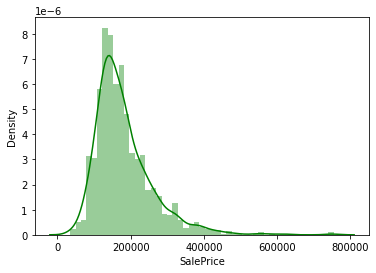

In [1930]:
# Project our Target Variable first
plt.figure()
sns.distplot(house_data['SalePrice'],color='g')
plt.show()

We see that the data is a bit right skewed, however it is normally distributed, so we will try to remove the outliers

In [1931]:
# Remove the outliers based on Interquartile ranges
numerical_columns = house_data.select_dtypes(exclude='object').columns
Q1 = house_data[numerical_columns].quantile(0.05)
Q3 = house_data[numerical_columns].quantile(0.95)
IQR = Q3 - Q1

house_data = house_data[~((house_data[numerical_columns] < (Q1 - 1.5 * IQR)) |(house_data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

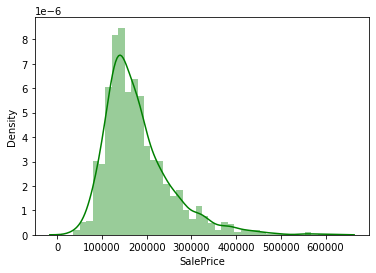

In [1932]:
# After Outlier Treatment, We manage to move a bit of the skewness, this should now be good for modelling
plt.figure()
sns.distplot(house_data['SalePrice'],color='g')
plt.show()

In [1933]:
# A graphPlotter function which plots the graphs based on the parameters passed
import math
def graphPlotter(graphType,house_data,x,y):
    plt.figure(figsize=[18, math.ceil(len(x)/2)*6])
    for i, col in enumerate(x, 1):
        plt.subplot(math.ceil(len(x)/2),2,i)
        title_text= f'{col} vs {y}'
        x_label= f'{col}'
        if graphType == 'scatterplot':
            fig= sns.scatterplot(data= house_data, x=col, y=y)
        else:
            fig= sns.boxplot(data= house_data, x=col, y=y)
        fig.set_title(title_text, fontdict= { 'fontsize': 15})
        fig.set_xlabel(x_label, fontdict= {'fontsize': 8})
    plt.show()

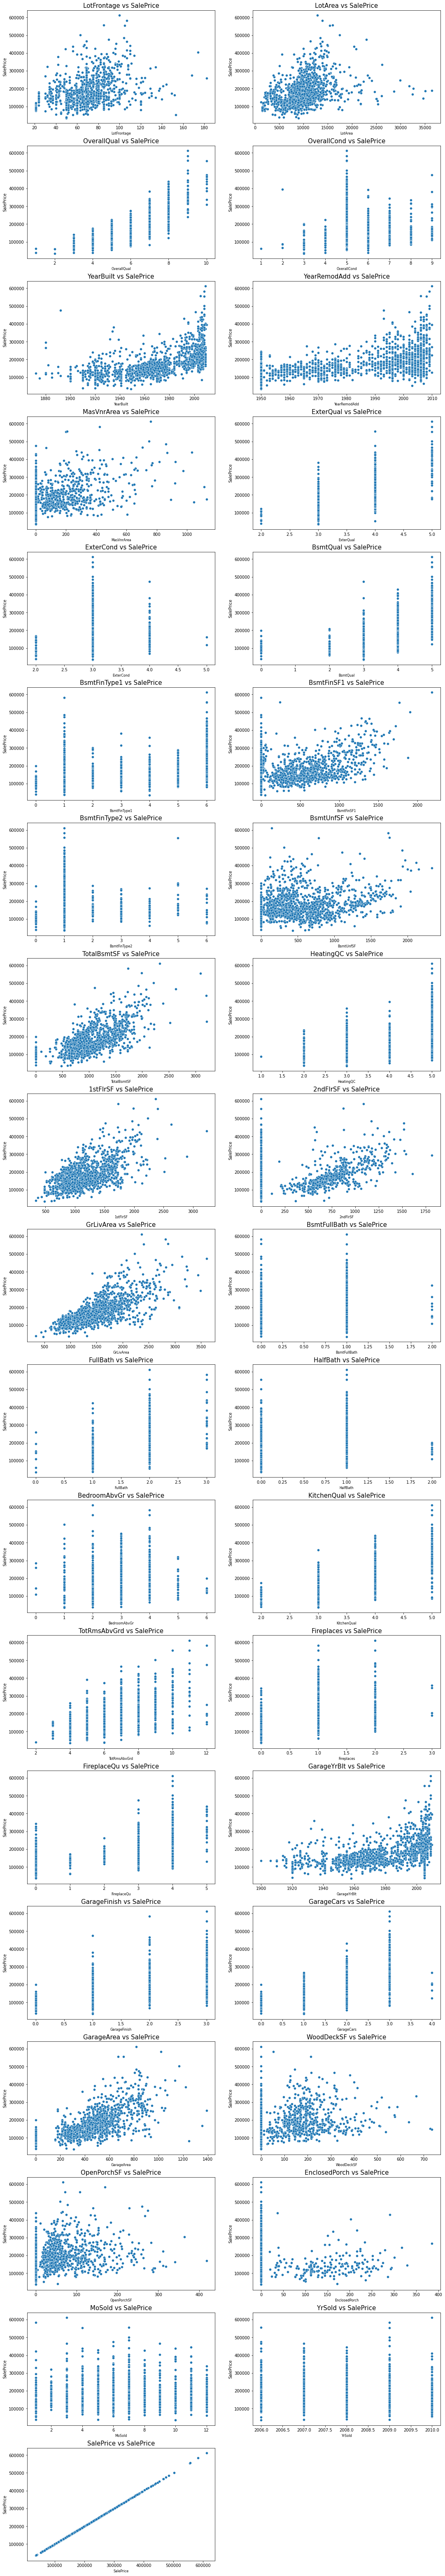

In [1934]:
#Visualising numerical variables
graphPlotter('scatterplot',house_data,numerical_columns,'SalePrice')

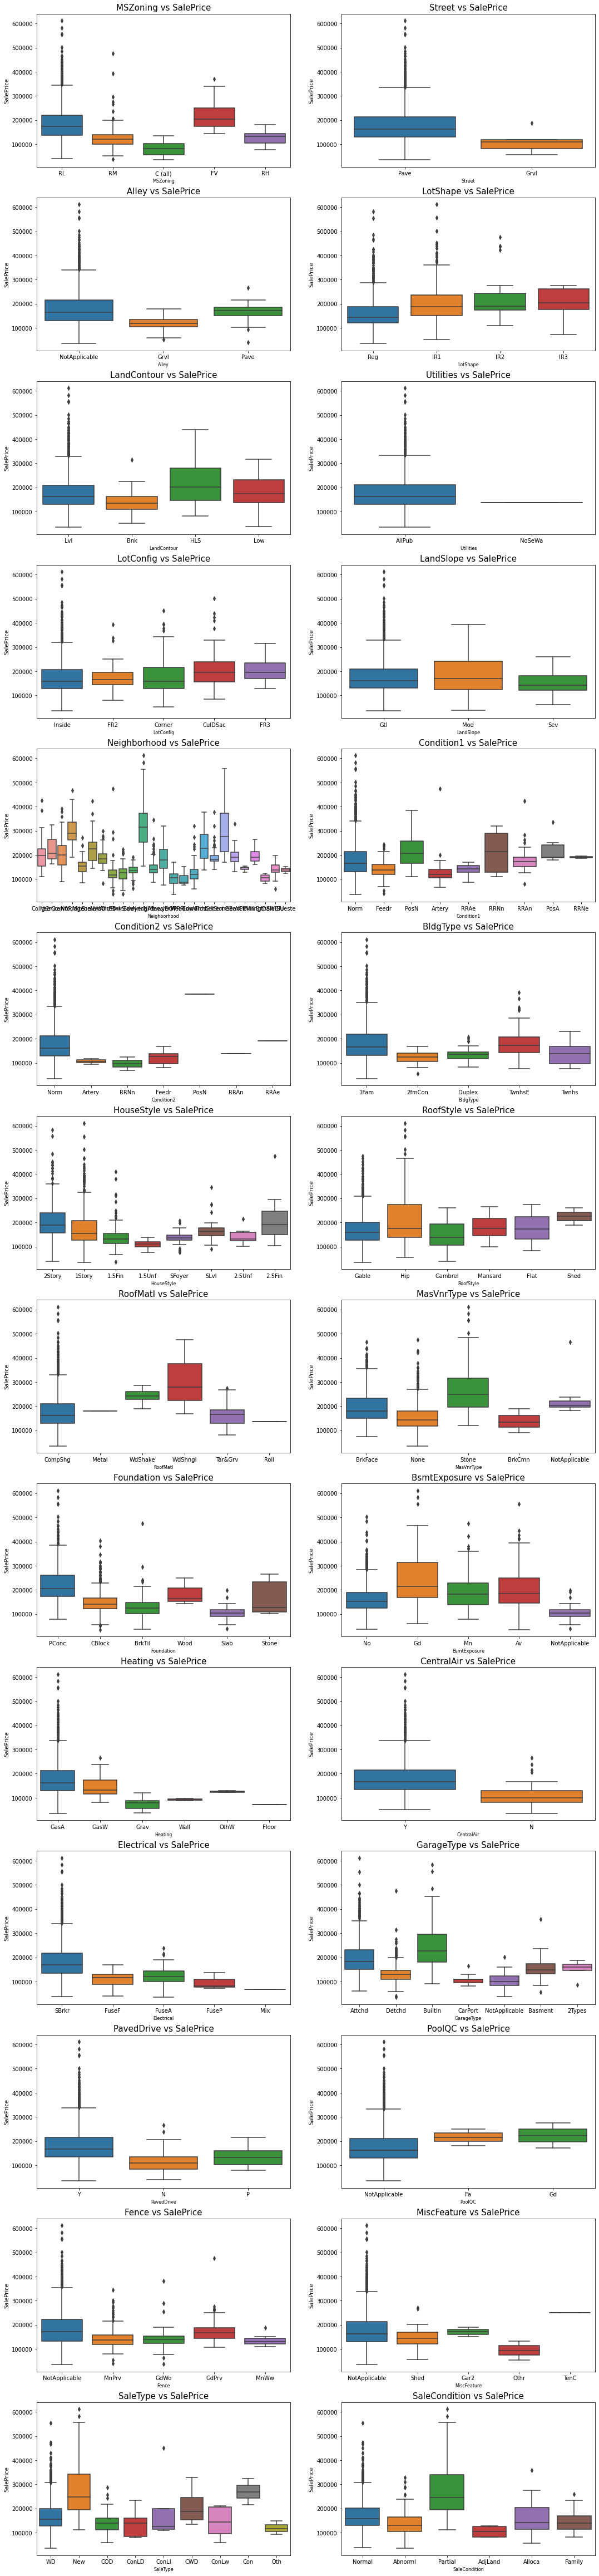

In [1935]:
#Visualising categorical variables
graphPlotter('boxplot',house_data,categorical_columns,'SalePrice')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

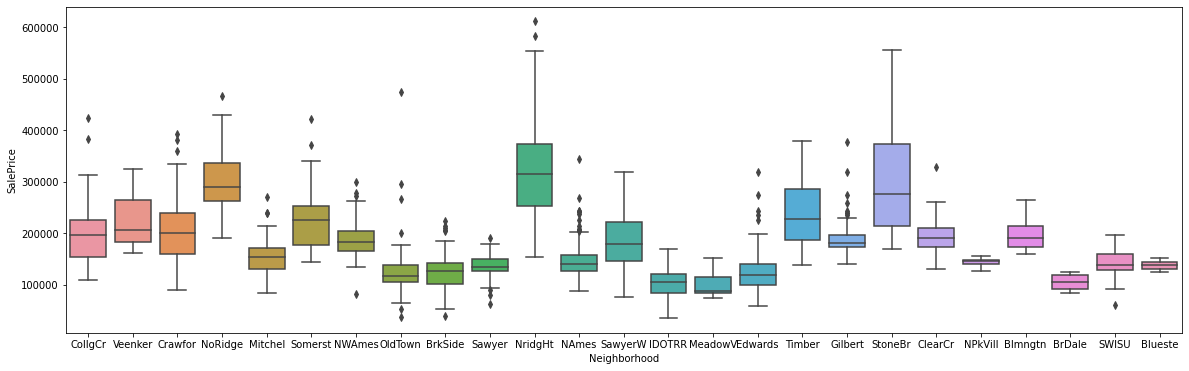

In [1936]:
#Visualising categorical variables
plt.figure(figsize=[20,6])
sns.boxplot(data= house_data, x= 'Neighborhood', y= 'SalePrice')

Inferences
- SalePrice is right sckewed and other numeric feature: 'GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea', 'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea' all have somewhat linear relation with SalePrice.

- Median SalePrice is higher for the houses with higher OverallQual rating. Houses with Excellent quality of the material on the exterior have highest price. Price reduces as quality decreases.

- SalePrice is high for houses having Neighbourhood : Northridge Heights, Stone Brook, Northridge And Price is comparatively lower in Iowa DOT and Rail Road, Meadow Village neighbourhood.
- Median SalePrice is higher for the houses having Excellent Heating quality and median price reduces with Heating quality type and least for the houses having Poor heating quality.
- Median SalePrice is very high for Good Living Quarters type basement finished area and if the beasement height is more than 100+ inches and least for the houses not having basement.
- Houses having atleast 1 fireplace, have higher median SalePrice. If Fireplace quality is 'Excellent - Exceptional Masonry Fireplace' then the median SalePrice is the highest.
- Houses having a garage as part of the house (typically has room above garage) and garage interior 'finish' or 'Rough Finished', have higest median SalePrice. Price is lower for the houses having no garage.
- Houses with garage in car capacity of 3 have highest median SalePrice.
- Houses having Poured Contrete foundation has higher SalePrice. Price for houses having Stone and Wood foundations is positive skewed.
- SalePrice is high for houses with 3 Full bathrooms above grade.

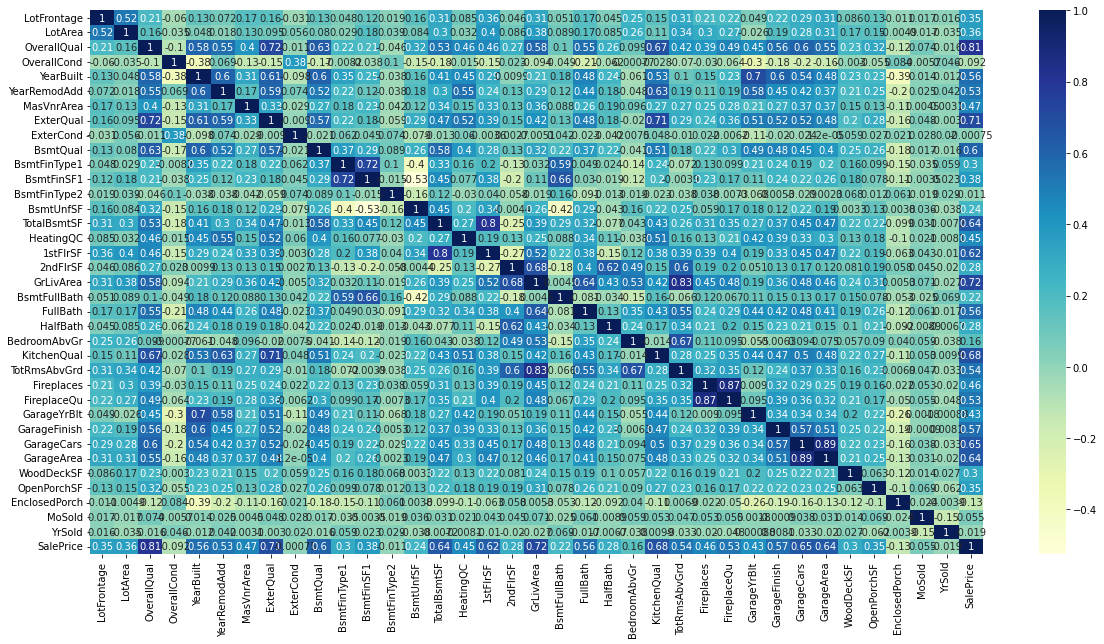

In [1937]:
# Let us now print the correlation matrix for the dataset
plt.figure(figsize=(20, 10))
sns.heatmap(house_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

It seems that there are many variables with high correlation, let us narrow down our feature set to find more insights

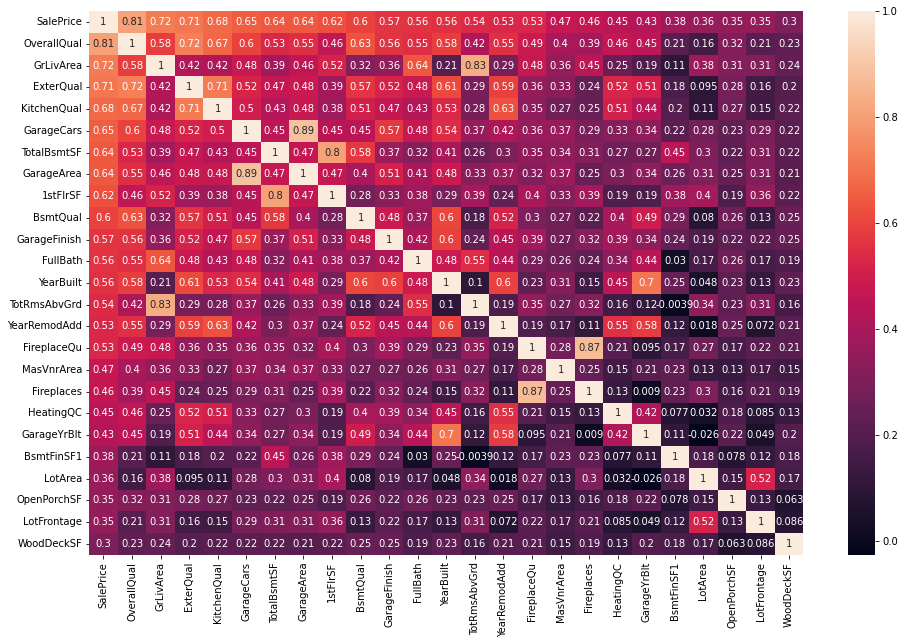

In [1938]:
# sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = house_data.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(house_data[cols].corr(),annot=True)
plt.show()
# OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF are highly correlated to Saleprice

OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF are highly correlated to Saleprice, 
We can can also observe that features like GrLivArea and TotRmsAbvGrd have correlation of .83 and GarageCars and GarageArea have correlation of .89 and FirplaceQu and Fireplaces have correlation of .87 , we can either choose to drop these here itself by choosing one of them or eliminate it in the feature elimination step.

### Create Dummy Variables

In [1939]:
# Convert categorical value into Dummy variable
house_data=pd.get_dummies(house_data,drop_first=True)
house_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0


### Prepare the dataset for model training

In [1940]:
#Split the data into train and test
y = house_data.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1941]:
X = house_data
X.shape

(1433, 183)

In [1942]:
# We have kept the test size as 30% here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [1943]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
598,80.0,12984,5,6,1977,1977,459.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
126,69.0,4928,6,5,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1109,107.0,11362,8,5,2004,2005,42.0,4,3,5,...,0,0,0,0,1,0,0,0,1,0
1315,85.0,11075,6,5,1969,1969,0.0,3,3,2,...,0,0,0,0,1,0,0,0,1,0
148,63.0,7500,7,5,2004,2005,120.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0


In [1944]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (1003, 183)
X_test shape (430, 183)
y_train shape (1003,)
y_test shape (430,)


### Scaling

In [1945]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
598,80.0,12984,5,6,1977,1977,459.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
126,69.0,4928,6,5,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1109,107.0,11362,8,5,2004,2005,42.0,4,3,5,...,0,0,0,0,1,0,0,0,1,0
1315,85.0,11075,6,5,1969,1969,0.0,3,3,2,...,0,0,0,0,1,0,0,0,1,0
148,63.0,7500,7,5,2004,2005,120.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0


In [1946]:
num_vars= X_train.select_dtypes(exclude=['object']).columns
X_train[num_vars].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
598,80.0,12984,5,6,1977,1977,459.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
126,69.0,4928,6,5,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1109,107.0,11362,8,5,2004,2005,42.0,4,3,5,...,0,0,0,0,1,0,0,0,1,0
1315,85.0,11075,6,5,1969,1969,0.0,3,3,2,...,0,0,0,0,1,0,0,0,1,0
148,63.0,7500,7,5,2004,2005,120.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0


In [1947]:
X_train[num_vars].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,...,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,69.297109,9713.658026,6.053838,5.560319,1971.006979,1984.042871,98.186441,3.376869,3.082752,3.466600,...,0.001994,0.001994,0.084746,0.001994,0.871386,0.002991,0.007976,0.014955,0.817547,0.084746
std,19.205670,3955.925666,1.350350,1.117409,30.032201,20.891679,166.604376,0.562947,0.340441,0.877548,...,0.044632,0.044632,0.278642,0.044632,0.334939,0.054636,0.088996,0.121434,0.386410,0.278642
min,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7586.500000,5.000000,5.000000,1953.000000,1965.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,9450.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11419.500000,7.000000,6.000000,2000.000000,2003.000000,156.500000,4.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,182.000000,36500.000000,10.000000,9.000000,2009.000000,2010.000000,1047.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1948]:
# Using standard scaler as it is less prone to outliers and the data we have is normally distirbuted.
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [1949]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
598,0.557556,0.827107,-0.780808,0.393679,0.199653,-0.337282,2.166771,-0.669792,-0.243194,0.608133,...,-0.044699,-0.044699,-0.30429,-0.044699,0.384184,-0.054772,-0.089667,-0.123216,0.472409,-0.30429
126,-0.015478,-1.210348,-0.039890,-0.501695,0.166339,-0.385172,-0.589633,-0.669792,-0.243194,0.608133,...,-0.044699,-0.044699,-0.30429,-0.044699,0.384184,-0.054772,-0.089667,-0.123216,0.472409,-0.30429
1109,1.964092,0.416885,1.441946,-0.501695,1.099136,1.003633,-0.337413,1.107460,-0.243194,1.748240,...,-0.044699,-0.044699,-0.30429,-0.044699,0.384184,-0.054772,-0.089667,-0.123216,0.472409,-0.30429
1315,0.818025,0.344299,-0.039890,-0.501695,-0.066861,-0.720401,-0.589633,-0.669792,-0.243194,-1.672081,...,-0.044699,-0.044699,-0.30429,-0.044699,0.384184,-0.054772,-0.089667,-0.123216,0.472409,-0.30429
148,-0.328041,-0.559859,0.701028,-0.501695,1.099136,1.003633,0.130996,-0.669792,-0.243194,0.608133,...,-0.044699,-0.044699,-0.30429,-0.044699,0.384184,-0.054772,-0.089667,-0.123216,0.472409,-0.30429


### Model Building

In [1950]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1951]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 99),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 30),
 ('BsmtQual', False, 17),
 ('BsmtFinType1', False, 79),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 129),
 ('BsmtUnfSF', False, 32),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 94),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 80),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 125),
 ('FullBath', False, 87),
 ('HalfBath', False, 53),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', False, 102),
 ('GarageYrBlt', False, 126),
 ('GarageFinish', False, 121),
 ('GarageCars', False, 18),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 122),
 ('OpenPorchSF', False, 23),
 ('EnclosedPorch', False, 70),
 ('MoSold', False, 84),
 ('YrSold', False, 105),
 ('MSSubClass_160',

In [1952]:
# Extract the top features
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'MSSubClass_160', 'MSSubClass_20',
       'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_80', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_RRAn', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_WdShngl',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'BsmtExposure_Gd', 'BsmtExposure_NotApplicable',
       'GarageType_NotApplicable', 'MiscFeature_TenC', 'SaleType_New',
       'SaleCondition_Normal'

In [1953]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 50)
(430, 50)
(1003,)
(430,)


In [1954]:
lm1=lm.fit(X_train1, y_train)

In [1955]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

177644.40777666995
[ 1913.93923001  4282.23967848 10662.43453684  6420.45748083
 10871.18568123  5097.23606639  3046.20069994  7544.75534347
 12108.53087134 -9824.84950954 30517.5093168  -6316.6822238
  6306.38124348  7768.361601    2082.64649264  5167.04165861
  2065.34923782  5342.83988182  3495.61218681  5318.51033785
  8691.6136294   4319.24002192  2309.64583174  4079.14505689
  3122.88786137  5520.57855871  6088.73931951  3271.02691094
  2106.89659244 -2488.16856406  3174.80433035  7342.03971355
 -3378.55738795  2590.33614042  2461.05875675  9937.54181974
  2603.3718317  11618.15947054  2246.3364545   2073.45270303
  1420.20191789  6352.16174581  3783.18340159  7452.24530508
  4154.20483701  2188.43013395 -1384.6349677   4968.64040984
  4322.94117333  4968.64040984]


In [1956]:
metrics = []

In [1957]:
def metricGenerator(y_train,y_test,y_pred_train,y_pred_test):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2Score(Train):",r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2Score(Test):",r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS(Train):",rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS(Test):",rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE(Train):",mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE(Test):",mse_test_lr)
    metric.append(mse_test_lr**0.5)
    metrics.append(metric)

In [1958]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)
metricGenerator(y_train,y_test,y_pred_train,y_pred_test)

R2Score(Train): 0.9136031178563329
R2Score(Test): 0.8828699772306641
RSS(Train): 489626622998.0885
RSS(Test): 270230631977.87372
MSE(Train): 488162136.58832353
MSE(Test): 628443330.1811017


### Ridge Regression

In [1959]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1500 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
# Since Ridge is a non feature eliminating model we will be using the top RFE chosen features for the training           
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1960]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 20}
-16865.260707504647


In [1961]:
alpha = ridge_model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 2081.72710037,  4100.91381879, 10778.04015201,  6192.44271984,
       10526.2868442 ,  5065.20919981,  3478.29084058,  7523.64464289,
        9537.27441084, -2315.2071816 , 22702.20115084, -5316.71897166,
        6640.63448787,  7736.95009083,  2335.09125201,  5419.46654356,
         357.70767497,  4413.59420919,  3152.29995856,  3334.15611493,
        6367.44867921,  2718.64919441,  1600.18724823,  4010.39121543,
        3564.35182545,  5540.60583525,  6076.80651361,  3213.56403984,
        2052.48109025, -2849.35385288,  1717.03708955,  1343.70148672,
       -1260.73015805,   791.75962227,   540.47587511,  3238.50081146,
        1095.35523288,  5110.27083455,   903.22866451,  2299.80830929,
          33.56260678,  4625.24918462,  2961.79529252,  6931.72881877,
        3015.63738591,  2071.2080255 , -1139.9754765 ,  4906.73588561,
        4172.31186285,  4906.73588561])

In [1962]:
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)


metricGenerator(y_train,y_test,y_pred_train,y_pred_test)

R2Score(Train): 0.9123799001149157
R2Score(Test): 0.8875873230737649
RSS(Train): 496558817274.79297
RSS(Test): 259347245137.33884
MSE(Train): 495073596.48533696
MSE(Test): 603133128.2263694


### Lasso Regression

In [1963]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1964]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 500}
-16924.757057844196


In [1965]:
alpha =lasso_model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [1966]:
lasso.coef_

array([ 2.28431163e+03,  3.76892449e+03,  1.07339064e+04,  6.00489117e+03,
        7.92788639e+03,  0.00000000e+00,  3.81705727e+03,  3.01475680e+03,
       -4.01339414e+02,  1.01279054e+03,  0.00000000e+00,  7.65297798e+03,
        0.00000000e+00, -0.00000000e+00,  7.54798610e+03,  4.04830545e+02,
        0.00000000e+00,  0.00000000e+00,  2.38580186e+04,  0.00000000e+00,
        0.00000000e+00,  9.61408529e+02, -3.85518125e+03,  6.42332617e+03,
        4.77666032e+03,  1.84315234e+03,  0.00000000e+00,  3.88787583e+02,
        0.00000000e+00,  6.91187247e+02,  3.44741626e+03,  1.13699601e+02,
        1.30324074e+03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -9.58482502e-01,  5.84038415e+01, -1.10603281e+03,  8.36417360e+02,
        1.13105010e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        5.82881150e+02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -5.28050053e+02, -3.50593492e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [1967]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


metricGenerator(y_train,y_test,y_pred_train,y_pred_test)

R2Score(Train): 0.9175733792649133
R2Score(Test): 0.8934193139347091
RSS(Train): 467126439685.103
RSS(Test): 245892261190.6036
MSE(Train): 465729251.9293151
MSE(Test): 571842467.8851247


Let us take a look at the graph of alpha vs neg-MAE

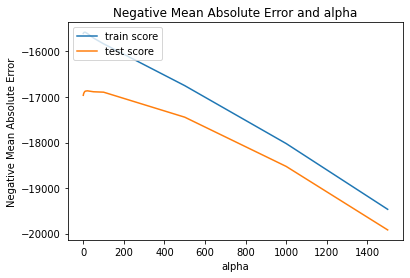

In [1968]:
# For Ridge
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

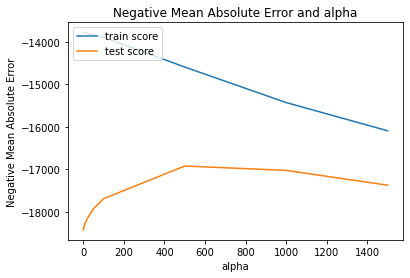

In [1969]:
# For Lasso
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We can see that the alpha values for Ridge : 20 and for Lasso: 500 can be interpreted from the graphs as well

In [1970]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metrics[0]
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metrics[1], name = 'Ridge Regression')
ls_metric = pd.Series(metrics[2], name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.136031e-01,9.123799e-01,9.175734e-01
1,R2 Score (Test),8.828700e-01,8.875873e-01,8.934193e-01
2,RSS (Train),4.896266e+11,4.965588e+11,4.671264e+11
3,RSS (Test),2.702306e+11,2.593472e+11,2.458923e+11
4,MSE (Train),2.209439e+04,2.225025e+04,2.158076e+04
5,MSE (Test),2.506877e+04,2.455877e+04,2.391323e+04


Clearly from the above comparison we can see that Lasso regression is performing a bit better on the Test set, however the performance of all the three are comparable.

### Residual Analysis

Ridge

In [1971]:
ridge_pred = ridge.predict(X_test1)

The errors are normally Distributed

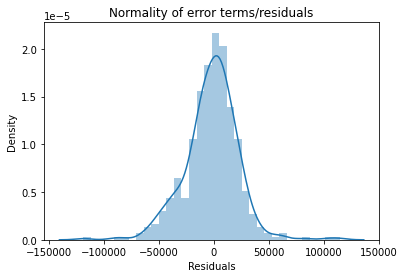

In [1972]:
# Distribution of errors
y_res=y_test-ridge_pred

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

Homoscedacity

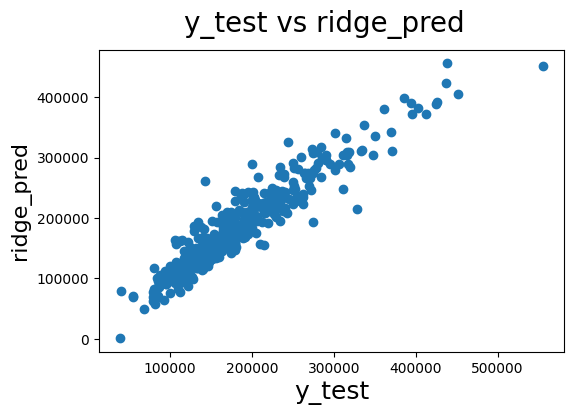

In [1973]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

Independence of Errors

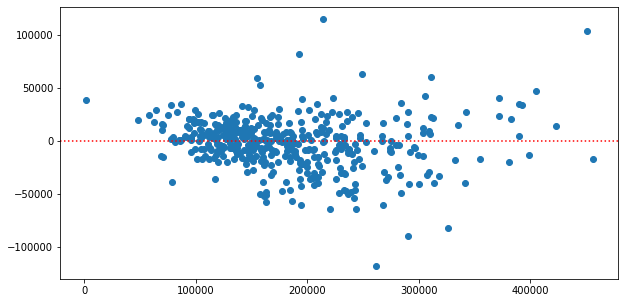

In [1974]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.scatter(ridge_pred, y_res)
ax.axhline(y=0, color='r', linestyle=':')

Lasso

In [1975]:
lasso_pred = lasso.predict(X_test)

The errors are normally Distributed

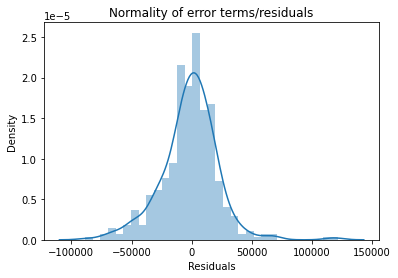

In [1976]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

Homoscedacity

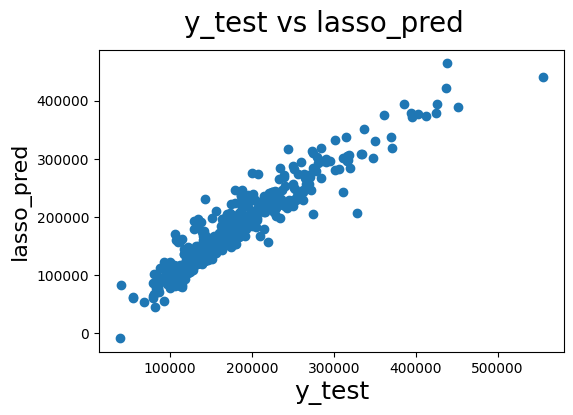

In [1977]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

Independence of Errors

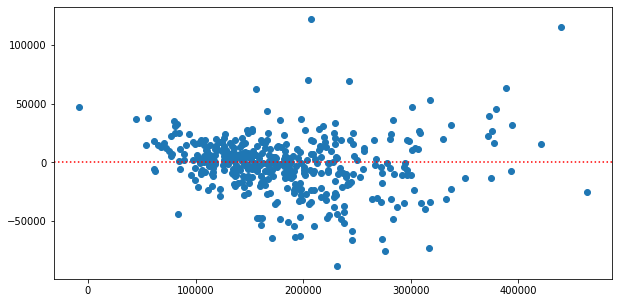

In [1978]:
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.scatter(lasso_pred, y_res)
ax.axhline(y=0, color='r', linestyle=':')

### Assumptions of linear regression validity.
- Multicolinearity: Made sure that there is no colinearity.
- Homoscedasticity: variance of residuals is within constant variance at every level.
- Error terms are normally distributed with test & train data.
- Linear dependency of target variable on few variables.
- Residuals are independent of each other

Both the models obey all the assumptions.

Other observations:
Lasso has made feature elimination/ feature selection where as Ridge didn't
Based on metrics comparison for ridge and lasso, lasso has a good test score and MSE value, also lasso does feature selection. Therefore for the current data & problem Lasso model is preferred.

# Part II

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [1979]:
print('Alpha for Lasso:',lasso_model_cv.best_params_['alpha'])
print('Alpha for Ridge:',ridge_model_cv.best_params_['alpha'])

Alpha for Lasso: 500
Alpha for Ridge: 20


Before Doubling Alpha

In [1980]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge.coef_, index= X_train1.columns)
top10_ridge=  ridge_coef[abs(ridge_coef).nlargest(10).index]
top10_ridge

GrLivArea          22702.201151
OverallQual        10778.040152
YearBuilt          10526.286844
TotalBsmtSF         9537.274411
TotRmsAbvGrd        7736.950091
BsmtFinSF1          7523.644643
BsmtExposure_Gd     6931.728819
KitchenQual         6640.634488
MSSubClass_60       6367.448679
OverallCond         6192.442720
dtype: float64

In [1981]:
lasso_coef= pd.Series(lasso.coef_, index= X_train.columns)
top10_lasso=  lasso_coef[abs(lasso_coef).nlargest(10).index]
top10_lasso

GrLivArea               23858.018589
OverallQual             10733.906437
YearBuilt                7927.886390
BsmtFinSF1               7652.977985
TotalBsmtSF              7547.986102
SaleType_New             6482.498877
KitchenQual              6423.326168
Neighborhood_NridgHt     6216.461376
OverallCond              6004.891166
BsmtExposure_Gd          5884.348042
dtype: float64

After Doubling Alpha

In [1982]:
alpha = 40
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)

Ridge(alpha=40)

In [1983]:
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)


metricGenerator(y_train,y_test,y_pred_train,y_pred_test)

R2Score(Train): 0.9110992464853968
R2Score(Test): 0.8884144401753956
RSS(Train): 503816511028.24243
RSS(Test): 257439003579.71933
MSE(Train): 502309582.28139824
MSE(Test): 598695357.162138


In [1984]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge.coef_, index= X_train1.columns)
top10_ridge=  ridge_coef[abs(ridge_coef).nlargest(10).index]
top10_ridge

GrLivArea               19375.887941
OverallQual             10809.410795
YearBuilt                9902.195218
TotalBsmtSF              8527.675168
TotRmsAbvGrd             7631.170553
BsmtFinSF1               7440.801495
KitchenQual              6812.199309
BsmtExposure_Gd          6699.451031
Neighborhood_StoneBr     6011.840273
OverallCond              5962.989639
dtype: float64

The R2 score for training dipped a bit, although very slightly and the coefficients of the parameters have also shrinked down a bit. However the top 10 features remained the same

In [1985]:
alpha = 1000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [1986]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


metricGenerator(y_train,y_test,y_pred_train,y_pred_test)

R2Score(Train): 0.9088572342830925
R2Score(Test): 0.8945881328741101
RSS(Train): 516522396195.595
RSS(Test): 243195679450.12177
MSE(Train): 514977463.8041824
MSE(Test): 565571347.5584227


In [1987]:
lasso_coef= pd.Series(lasso.coef_, index= X_train.columns)
top10_lasso=  lasso_coef[abs(lasso_coef).nlargest(10).index]
top10_lasso

GrLivArea               23837.975963
OverallQual             11631.104306
BsmtFinSF1               7359.474995
TotalBsmtSF              7061.048682
SaleType_New             6631.406191
KitchenQual              6578.963566
YearBuilt                6284.220244
Neighborhood_NridgHt     5797.236831
BsmtExposure_Gd          5304.424009
Neighborhood_StoneBr     5263.985423
dtype: float64

In [1988]:
print(len(metrics))

5


In [1989]:
betas = pd.DataFrame()
betas['Metric'] = ['R2 train','R2 test', 'RSS train', 'RSS test', 'MSE train', 'MSE test']
betas['Ridge_20'] = metrics[1]
betas['Ridge_40'] = metrics[3]
betas['Lasso_500'] = metrics[2]
betas['Lasso_1000'] = metrics[4]
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.9f}'.format)
betas

,Metric,Ridge_20,Ridge_40,Lasso_500,Lasso_1000
0,R2 train,0.912379900,0.911099246,0.917573379,0.908857234
1,R2 test,0.887587323,0.888414440,0.893419314,0.894588133
2,RSS train,496558817274.792968750,503816511028.242431641,467126439685.103027344,516522396195.594970703
3,RSS test,259347245137.338836670,257439003579.719329834,245892261190.603607178,243195679450.121765137
4,MSE train,22250.249357824,22412.264104311,21580.761152687,22693.114898669
5,MSE test,24558.768866260,24468.252025066,23913.227885108,23781.743997412


The R2 score for training dipped a bit, although very slightly and the coefficients of the parameters have also shrinked down a bit. However the top 10 features remained the same

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1990]:
# Checking top 5 features in our lasso model
lasso_coef[abs(lasso_coef).nlargest(5).index]

GrLivArea      23837.975962510
OverallQual    11631.104306013
BsmtFinSF1      7359.474995311
TotalBsmtSF     7061.048681872
SaleType_New    6631.406190798
dtype: float64

Since SaleType is a dummy variable we will drop entire SaleType columns

In [1991]:
# Checking all Neighborhood dummy variables
cols_to_drop= X_train.columns[X_train.columns.str.startswith('SaleType')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','BsmtFinSF1','TotalBsmtSF'])
cols_to_drop

['SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'GrLivArea',
 'OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF']

In [1992]:
# Droping above features from X_train and X_test
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1003, 171), (430, 171))

In [1993]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
{'alpha': 500}


In [1994]:
# Building Lasso model with these features
lasso3= Lasso(alpha= 500)
lasso3.fit(X_train, y_train)

Lasso(alpha=500)

In [1995]:
y_pred_train = lasso3.predict(X_train)
y_pred_test = lasso3.predict(X_test)


metricGenerator(y_train,y_test,y_pred_train,y_pred_test)

R2Score(Train): 0.9077238777777641
R2Score(Test): 0.8822712344560824
RSS(Train): 522945330734.29846
RSS(Test): 271611991210.47644
MSE(Train): 521381187.1727801
MSE(Test): 631655793.512736


In [1996]:
lasso_coef= pd.Series(lasso3.coef_, index= X_train.columns)
lasso_coef[abs(lasso_coef).nlargest(5).index]

1stFlrSF                24163.027405885
2ndFlrSF                19093.972727323
YearBuilt                8584.979716613
SaleCondition_Partial    7993.459725429
KitchenQual              7550.447119591
dtype: float64